# Objective:
## Business Context: 
•	One of the global banks would like to understand what factors driving credit card spend are. The bank wants use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data. 

•	The objective of this project is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants 


# Importing the packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from scipy.stats import f_oneway

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading the data and First Glance

In [4]:
df = pd.read_csv('CREDIT CARD USERS DATA.csv')

In [5]:
print(df.shape)
print(df.columns)

(5000, 132)
Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)


In [6]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,cardspent,card2items,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.43,2.0,11.1,1.20,0.18,2.24,0.81,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,3.0,2.0,5.0,81.66,4.0,67.80,0.0,3.0,5.0,1.0,6.50,1.87,34.40,3.54,1.0,29.0,3.37,161.05,5.08,1.0,29.50,3.38,126.1,4.84,1.0,14.25,2.66,60.00,4.09,0.0,0.00,#NULL!,0.00,#NULL!,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.71,1.0,18.6,1.22,0.20,1.57,0.45,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,1.0,3.0,0.0,4.0,2.0,5.0,42.60,2.0,34.94,1.0,1.0,39.0,0.0,8.90,2.19,330.60,5.80,0.0,0.0,#NULL!,0.00,#NULL!,1.0,54.85,4.00,1975.0,7.59,1.0,16.00,2.77,610.00,6.41,1.0,45.65,3.82,1683.55,7.43,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.56,2.0,9.9,0.93,-0.07,2.54,0.93,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,35.0,5.0,4.0,1.0,3.0,0.0,25.0,5.0,9.0,184.22,7.0,175.75,0.0,3.0,65.0,0.0,28.40,3.35,1858.35,7.53,0.0,0.0,#NULL!,0.00,#NULL!,0.0,0.00,#NULL!,0.0,#NULL!,1.0,23.00,3.14,1410.00,7.25,0.0,0.00,#NULL!,0.00,#NULL!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,3.00,1.0,5.7,0.02,-3.78,1.12,0.11,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,2.0,3.0,2.0,4.0,0.0,5.0,2.0,17.0,340.99,1.0,18.42,1.0,1.0,36.0,0.0,6.00,1.79,199.45,5.30,0.0,0.0,#NULL!,0.00,#NULL!,0.0,0.00,#NULL!,0.0,#NULL!,1.0,21.00,3.04,685.00,6.53,0.0,0.00,#NULL!,0.00,#NULL!,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.14,1.0,1.7,0.21,-1.54,0.18,-1.74,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,8.0,3.0,1.0,3.0,2.0,0.0,9.0,3.0,8.0,255.10,7.0,252.73,1.0,3.0,21.0,0.0,3.05,1.12,74.10,4.31,1.0,16.5,2.80,3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


# Data Cleaning

### - No Missing values found on the first look.

In [8]:
print(df.isna().sum().sum())

0


# Identifying the Dependent Variable. 

   ### - Total Spent is calculated using cardspent and card2spent 

In [9]:
df['totalspend'] =df['cardspent'] + df['card2spent']
df.drop(['cardspent', 'card2spent'], axis=1, inplace=True)

### - Removing Outliers

In [10]:
# Calculate the IQR
Q1 = df['totalspend'].quantile(0.25)
Q3 = df['totalspend'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['totalspend'] < lower_bound) | (df['totalspend'] > upper_bound)]

# Remove outliers from the DataFrame
df = df.drop(outliers.index)
df.shape

(4736, 131)

In [11]:
print(Q1,Q3)
print(lower_bound,upper_bound)

276.2825 615.5625
-232.63749999999993 1124.4825


In [12]:
df.totalspend.describe()

count    4736.000000
mean      439.889658
std       231.467271
min         8.110000
25%       268.025000
50%       399.375000
75%       571.245000
max      1124.330000
Name: totalspend, dtype: float64

# Separate columns by data types


In [13]:
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
categorical_cols = list(df.select_dtypes(include=['object']).columns)
print(len(numerical_cols))
print(len(categorical_cols))

114
17


## Handling Categorical Variables

In [14]:
column_names = []
num_unique_values = []
first_five_unique = []
for i in categorical_cols:
    column_names.append(i)
    num_unique_values.append(df[i].nunique())
    first_five_unique.append(df[i].unique()[:5])

data = {
    'Column Name': column_names,
    'Number of Unique Values': num_unique_values,
    'First Five Unique Values': first_five_unique
}

df_info = pd.DataFrame(data)
df_info


,Column Name,Number of Unique Values,First Five Unique Values
0,custid,4736,"[3964-QJWTRG-NPN, 0648-AIPJSP-UVM, 5195-TLUDJE..."
1,townsize,11,"[2.00, 5.00, 4.00, 3.00, 1.00]"
2,birthmonth,12,"[September, May, June, July, August]"
3,lncreddebt,1021,"[0.18, 0.20, -0.07, -3.78, -1.54]"
4,lnothdebt,935,"[0.81, 0.45, 0.93, 0.11, -1.74]"
5,commutetime,79,"[22.00, 29.00, 24.00, 38.00, 32.00]"
6,longten,4346,"[34.40, 330.60, 1858.35, 199.45, 74.10]"
7,lnlongten,1169,"[3.54, 5.80, 7.53, 5.30, 4.31]"
8,lntollmon,176,"[3.37, #NULL!, 2.80, 3.29, 3.43]"
9,lntollten,496,"[5.08, #NULL!, 5.96, 6.59, 7.48]"


In [15]:
for i in categorical_cols:
    df[i].replace("#NULL!", np.nan, inplace=True)
    try:
        df[i] = pd.to_numeric(df[i])
    except ValueError:
        print(i)

custid
birthmonth


In [16]:
df[categorical_cols].isna().sum()*100/len(df)

custid          0.000000
townsize        0.042230
birthmonth      0.000000
lncreddebt      0.021115
lnothdebt       0.021115
commutetime     0.042230
longten         0.063345
lnlongten       0.063345
lntollmon      53.082770
lntollten      53.082770
lnequipmon     66.469595
lnequipten     66.469595
lncardmon      28.737331
cardten         0.042230
lncardten      28.800676
lnwiremon      73.669764
lnwireten      73.669764
dtype: float64

### We notice that there are sum columns with #NULL!, which is a missing values, we are handling it by dropping the column if the missing value percentage is more than 25, else we are impution by mean.

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = df[categorical_cols].isna().sum() * 100 / len(df)

# Columns to drop (missing values > 25%)
columns_to_drop = missing_percentage[missing_percentage > 25].index
df.drop(columns_to_drop, axis=1, inplace=True)

# Columns to fill missing values with the mean (missing values <= 25%)
columns_to_fill_mean = missing_percentage[(missing_percentage <= 25) & (missing_percentage > 0)].index
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()), axis=0)


In [18]:
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
categorical_cols = list(df.select_dtypes(include=['object']).columns)
print(len(numerical_cols))
print(len(categorical_cols))
print((categorical_cols))

121
2
['custid', 'birthmonth']


### Now we have only 2 Columns of Object type. Rest as numeric Data.

In [19]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,card2items,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend
0,3964-QJWTRG-NPN,1.0,2.0,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.43,2.0,11.1,1.20,0.18,2.24,0.81,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,3.0,2.0,5.0,4.0,0.0,3.0,5.0,1.0,6.50,1.87,34.40,3.54,1.0,29.0,161.05,1.0,29.50,126.1,1.0,14.25,60.0,0.0,0.00,0.00,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,0648-AIPJSP-UVM,5.0,5.0,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.71,1.0,18.6,1.22,0.20,1.57,0.45,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,1.0,3.0,0.0,4.0,2.0,5.0,2.0,1.0,1.0,39.0,0.0,8.90,2.19,330.60,5.80,0.0,0.0,0.00,1.0,54.85,1975.0,1.0,16.00,610.0,1.0,45.65,1683.55,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,5195-TLUDJE-HVO,3.0,4.0,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.56,2.0,9.9,0.93,-0.07,2.54,0.93,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,35.0,5.0,4.0,1.0,3.0,0.0,25.0,5.0,9.0,7.0,0.0,3.0,65.0,0.0,28.40,3.35,1858.35,7.53,0.0,0.0,0.00,0.0,0.00,0.0,1.0,23.00,1410.0,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4459-VLPQUH-3OL,4.0,3.0,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,3.00,1.0,5.7,0.02,-3.78,1.12,0.11,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,2.0,3.0,2.0,4.0,0.0,5.0,2.0,17.0,1.0,1.0,1.0,36.0,0.0,6.00,1.79,199.45,5.30,0.0,0.0,0.00,0.0,0.00,0.0,1.0,21.00,685.0,0.0,0.00,0.00,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,8158-SMTQFB-CNO,2.0,2.0,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.14,1.0,1.7,0.21,-1.54,0.18,-1.74,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,8.0,3.0,1.0,3.0,2.0,0.0,9.0,3.0,8.0,7.0,1.0,3.0,21.0,0.0,3.05,1.12,74.10,4.31,1.0,16.5,387.70,0.0,0.00,0.0,1.0,17.25,360.0,1.0,19.05,410.80,0.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,27.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [20]:
df.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,card2items,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend
count,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.00000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000
mean,2.993243,2.692438,0.509502,46.865709,4.224240,14.489231,2.651605,2.752745,0.152449,9.569046,2.905828,0.153716,51.508235,3.659043,2.327280,9.933383,1.715944,-0.173356,3.397931,0.656879,0.233953,2.950591,0.481208,6.114654,0.638936,2.206926,3.068623,0.497677,0.385346,0.111275,0.054899,0.115076,0.048564,1.855785,0.624155,1.843750,16.229941,3.250000,2.133868,0.637669,0.344806,22.192188,1.357052,0.221706,0.359586,3.000000,1.976562,25.33967,0.678843,0.100084,0.271959,0.405194,0.274704,0.093117,0.124578,0.384502,0.059122,0.188345,7.636613,4.082559,0.379856,0.235220,0.512669,2.758868,2.511402,2.511191,0.190456,16.457770,3.760346,2.779139,2.539062,2.533995,0.190034,12.949113,3.550042,10.042230,4.571368,0.467694,2.053632,37.908361,0.252111,13.329096,2.279054,697.517853,5.590380,0.469172,12.953231,559.065625,0.335304,12.682073,452.431693,0.712627,15.328072,711.357626,0.263302,10.353294,402.647245,0.482052,0.299409,0.239231,1.181799,0.470439,0.472762,0.474451,0.471706,0.344806,0.982052,19.622889,0.911740,0.909840,0.929899,0.194257,0.627534,0.475718,0.472762,0.173564,0.468750,0.083826,0.129645,0.100084,439.889658
std,1.424909,1.427309,0.499962,17.932306,1.320607,3.281752,1.209182,1.737436,0.359494,9.630156,1.452231,0.360715,48.016298,0.725945,1.188533,6.360147,2.705942,1.255475,4.394252,1.110925,0.423387,1.377787,0.499699,7.729409,1.880629,1.391725,3.415126,0.857291,0.791153,0.498013,0.322911,0.571089,0.480415,3.074798,0.484391,0.916167,12.425581,1.326

In [21]:

# Calculate the cardinality of each column
cardinality = df.nunique()
# Create a DataFrame to store the cardinality information
cardinality_df = pd.DataFrame(cardinality, columns=['Cardinality'])
# Group the columns by their cardinality and count how many columns have the same cardinality
cardinality_count = cardinality_df['Cardinality'].value_counts().reset_index()
cardinality_count.columns = ['Cardinality', 'Column Count']
# Sort the DataFrame by the cardinality values
cardinality_count.sort_values(by='Cardinality', inplace=True)



In [22]:
cardinality_count.head(10)

,Cardinality,Column Count
0,2,49
3,3,4
2,4,6
1,5,14
4,6,4
5,7,4
42,8,1
6,9,3
27,10,1
30,12,1


## Calibarating the datatypes
### - We are assuming that the columns with less than or equal to 10 Cardinailty or Datatype as object as Categorical varibles and rest are  numerical variables. 

In [23]:
df.shape

(4736, 123)

In [24]:
cardinality = df.nunique()
categorical_cols = list(cardinality[cardinality <= 10].index)
object_cols = list(df.select_dtypes(include='object').columns)
categorical_cols += object_cols

numerical_cols = list(set(df.columns) - set(categorical_cols))


categorical_cols.remove('custid')      # Primary Key
numerical_cols.remove('totalspend')    # Dependent Variable

print(len(cardinality))
print(len(categorical_cols))
print(len(numerical_cols))

123
87
34


In [25]:
print(len(cardinality))
print(len(categorical_cols))
print(len(numerical_cols))

123
87
34


# As there are too many columns in the data for EDA and model building we are using the the top 25 Columns.

## ANOVA test is used for selecting top 15 categorical variables and Correlation metrics is used for selecting top 10 numerical variables

In [26]:
# 1. Perform ANOVA test for total spend and categorical variables
anova_metrics = []
for col in categorical_cols:
    groups = df.groupby(col)['totalspend'].apply(list)
    f_statistic, p_value = f_oneway(*groups)
    anova_metrics.append({'Categorical Variable': col, 'F-Statistic': f_statistic, 'P-Value': p_value})
    
# 2. Create a dataframe with ANOVA metrics and p-values
anova_df = pd.DataFrame(anova_metrics)

In [27]:
anova_df.head()

,Categorical Variable,F-Statistic,P-Value
0,region,1.826618,1.207460e-01
1,townsize,0.368992,8.701249e-01
2,gender,16.347449,5.356514e-05
3,agecat,29.251843,4.628003e-24
4,edcat,6.110780,6.685326e-05


In [28]:
# 3. Perform correlation test for total spend and numerical variables
correlation_metrics = []
for col in numerical_cols:
    correlation_coefficient = df['totalspend'].corr(df[col])
    correlation_metrics.append({'Numerical Variable': col, 'Correlation Coefficient': correlation_coefficient, 'Absolute Correlation': abs(correlation_coefficient)})

# 4. Create a dataframe with correlation metrics
correlation_df = pd.DataFrame(correlation_metrics)

In [29]:
correlation_df.head()

,Numerical Variable,Correlation Coefficient,Absolute Correlation
0,card2items,0.469064,0.469064
1,income,0.290688,0.290688
2,cardmon,0.011051,0.011051
3,tollmon,0.044750,0.044750
4,lnothdebt,0.241712,0.241712


In [30]:
correlation_df.columns

Index(['Numerical Variable', 'Correlation Coefficient',
       'Absolute Correlation'],
      dtype='object')

In [31]:
# 5. Select top 12 Categorical columns and top 8 Numerical variables
top_categorical_cols = anova_df.nlargest(15, 'F-Statistic')['Categorical Variable'].tolist()
top_numerical_cols = correlation_df.nlargest(10, 'Absolute Correlation')['Numerical Variable'].tolist()

# Print the selected top categorical and numerical columns
print("Top 15 Categorical Columns:", top_categorical_cols)
print("Top 10 Numerical Columns:", top_numerical_cols)
print("Primary Key: [custid]")
print("Dependent variable : [totalspend]")

Top 15 Categorical Columns: ['inccat', 'retire', 'carcatvalue', 'card', 'owndvd', 'ownvcr', 'owncd', 'card2', 'carown', 'agecat', 'reason', 'owntv', 'gender', 'homeown', 'addresscat']
Top 10 Numerical Columns: ['card2items', 'carditems', 'lninc', 'income', 'carvalue', 'lnothdebt', 'othdebt', 'lncreddebt', 'creddebt', 'ed']
Primary Key: [custid]
Dependent variable : [totalspend]


## Coming up with the final df to perform the analysis

In [32]:
df_backup = df.copy()

In [33]:
selected_cols = ['custid']+ top_categorical_cols + top_numerical_cols + ['totalspend']
df = df[selected_cols]


In [34]:
print(df.shape)
print(df.columns)

(4736, 27)
Index(['custid', 'inccat', 'retire', 'carcatvalue', 'card', 'owndvd', 'ownvcr',
       'owncd', 'card2', 'carown', 'agecat', 'reason', 'owntv', 'gender',
       'homeown', 'addresscat', 'card2items', 'carditems', 'lninc', 'income',
       'carvalue', 'lnothdebt', 'othdebt', 'lncreddebt', 'creddebt', 'ed',
       'totalspend'],
      dtype='object')


In [35]:
df.head()

,custid,inccat,retire,carcatvalue,card,owndvd,ownvcr,owncd,card2,carown,agecat,reason,owntv,gender,homeown,addresscat,card2items,carditems,lninc,income,carvalue,lnothdebt,othdebt,lncreddebt,creddebt,ed,totalspend
0,3964-QJWTRG-NPN,2.0,0.0,1.0,3.0,1.0,1.0,0.0,5.0,1.0,2.0,9.0,1.0,1.0,0.0,1.0,4.0,5.0,3.43,31.0,14.3,0.81,2.24,0.18,1.20,15.0,149.46
1,0648-AIPJSP-UVM,1.0,0.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,2.0,9.0,1.0,0.0,1.0,1.0,2.0,5.0,2.71,15.0,6.8,0.45,1.57,0.20,1.22,17.0,77.54
2,5195-TLUDJE-HVO,2.0,0.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,6.0,2.0,1.0,1.0,1.0,5.0,7.0,9.0,3.56,35.0,18.8,0.93,2.54,-0.07,0.93,14.0,359.97
3,4459-VLPQUH-3OL,1.0,0.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,9.0,1.0,0.0,1.0,2.0,1.0,17.0,3.00,20.0,8.7,0.11,1.12,-3.78,0.02,16.0,359.41
4,8158-SMTQFB-CNO,1.0,0.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,3.0,9.0,1.0,0.0,0.0,2.0,7.0,8.0,3.14,23.0,10.6,-1.74,0.18,-1.54,0.21,16.0,507.83


# EDA

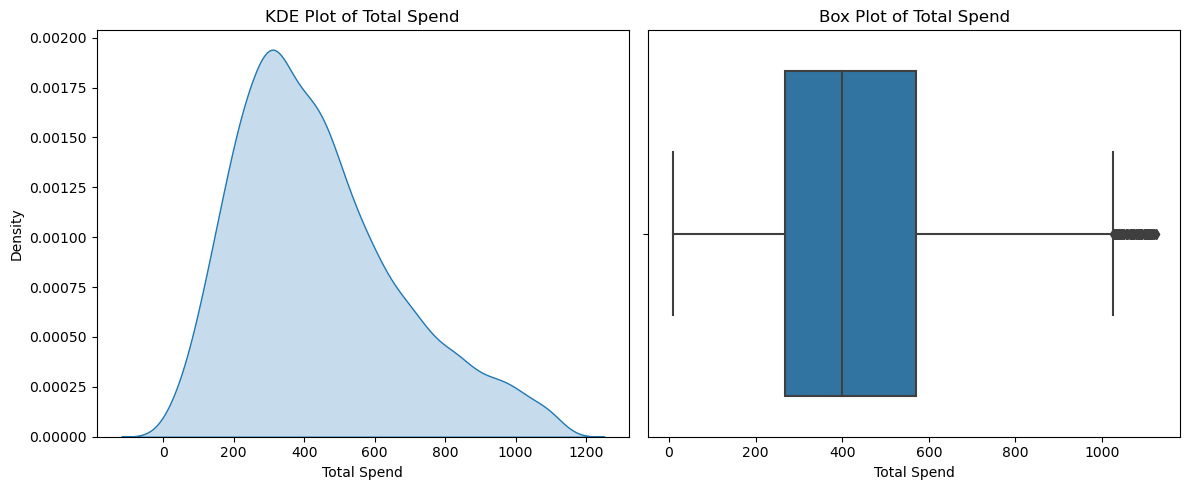

In [36]:
# Create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Subplot 1: KDE Plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=df['totalspend'], shade=True)
plt.xlabel('Total Spend')
plt.ylabel('Density')
plt.title('KDE Plot of Total Spend')

# Subplot 2: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['totalspend'])
plt.xlabel('Total Spend')
plt.title('Box Plot of Total Spend')

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig('totalspend.png', transparent=True)
plt.show()


#### Technical Insight: The Y variable is slightly right skewed. We ignore it as we have already perfomed the outlier treatment in the first look.

## Uni-Variate Analysis

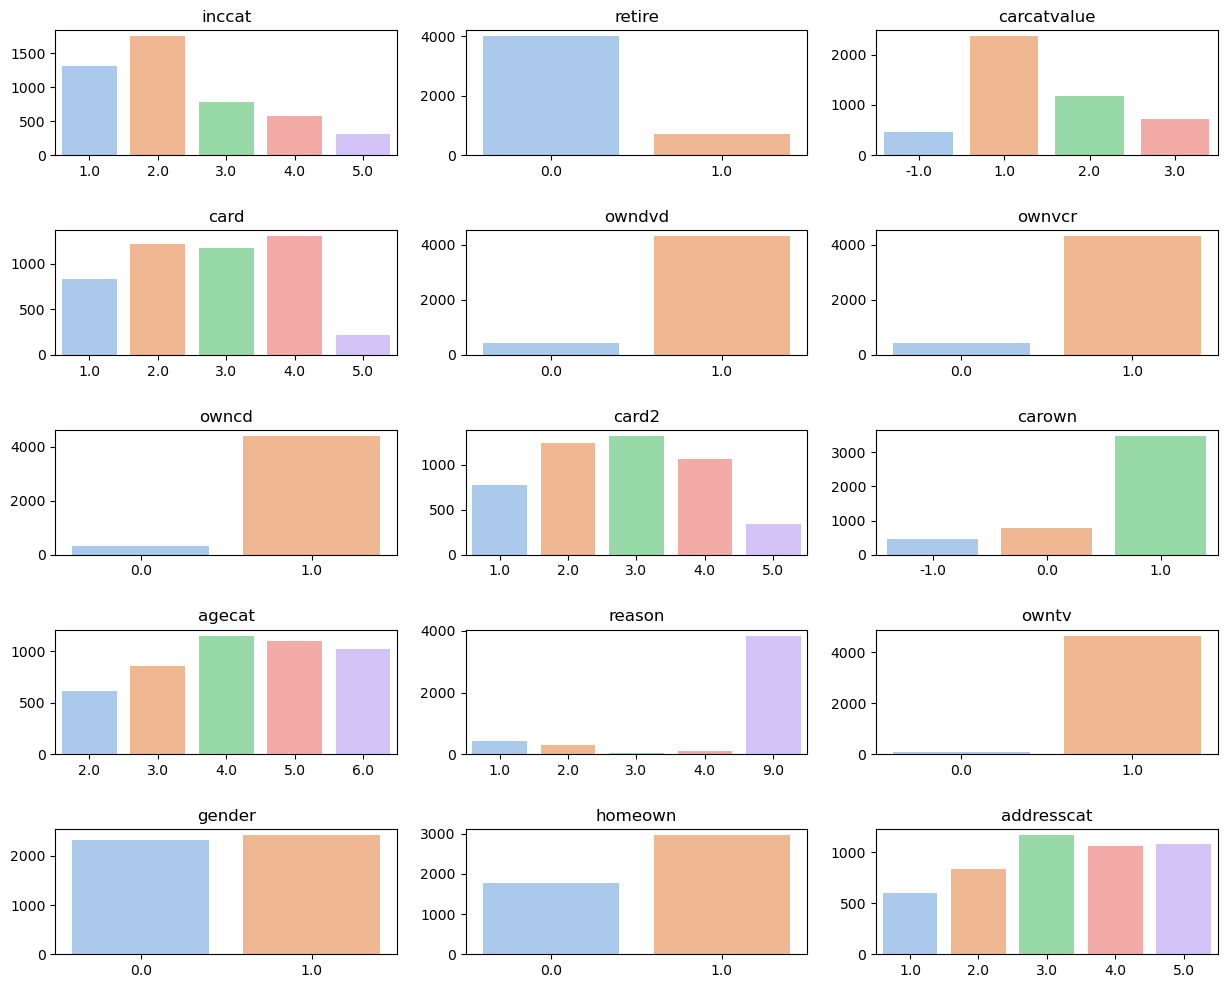

In [37]:
categorical_columns =top_categorical_cols
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


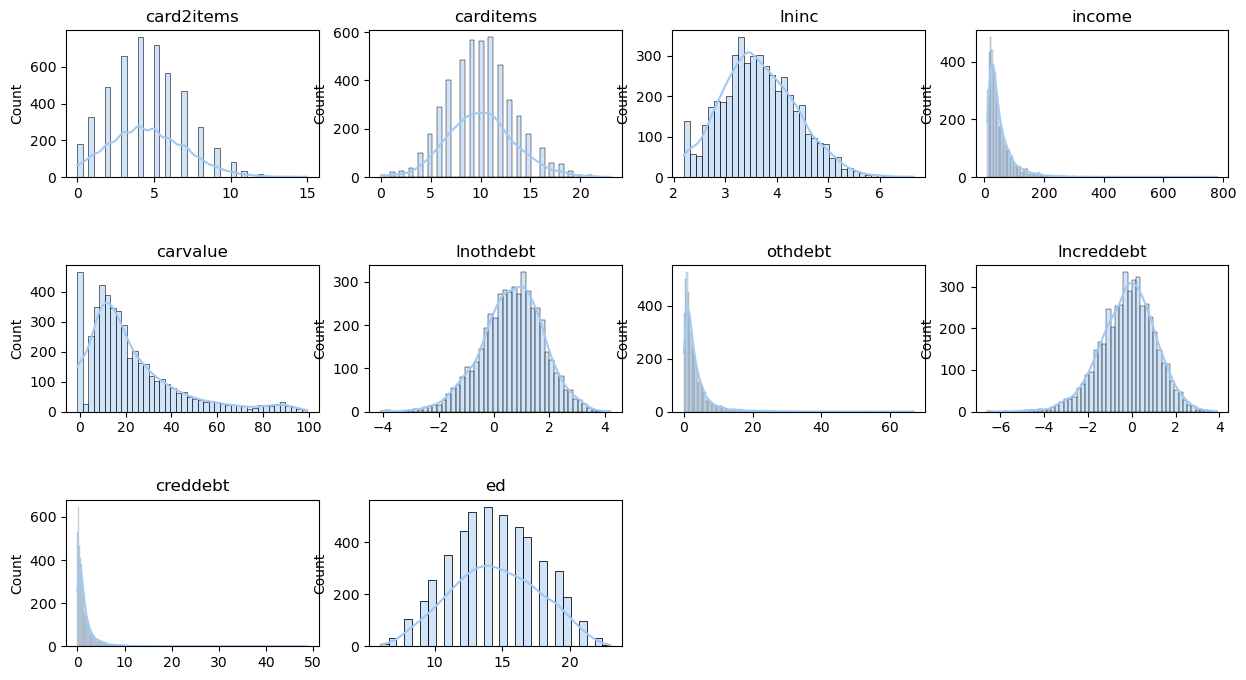

In [38]:
numerical_columns = top_numerical_cols

num_plots = len(numerical_columns)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


In [39]:
# # #################################################### 

# # Create an empty list to store the summary statistics
# summary_data = []

# # Loop through each numerical column and calculate the summary statistics
# for column in numerical_columns:
#     mean_val = df[column].mean()
#     std_val = df[column].std()
#     min_val = df[column].min()
#     q25 = df[column].quantile(0.25)
#     median_val = df[column].median()
#     q75 = df[column].quantile(0.75)
#     max_val = df[column].max()
    
#     summary_data.append([column, mean_val, std_val, min_val, q25, median_val, q75, max_val])

# # Create a DataFrame from the summary data list
# summary_df = pd.DataFrame(summary_data, columns=['Numerical Variable', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum'])

# # Display the summary statistics DataFrame
# print(summary_df)


## Bi Variate Grapghs

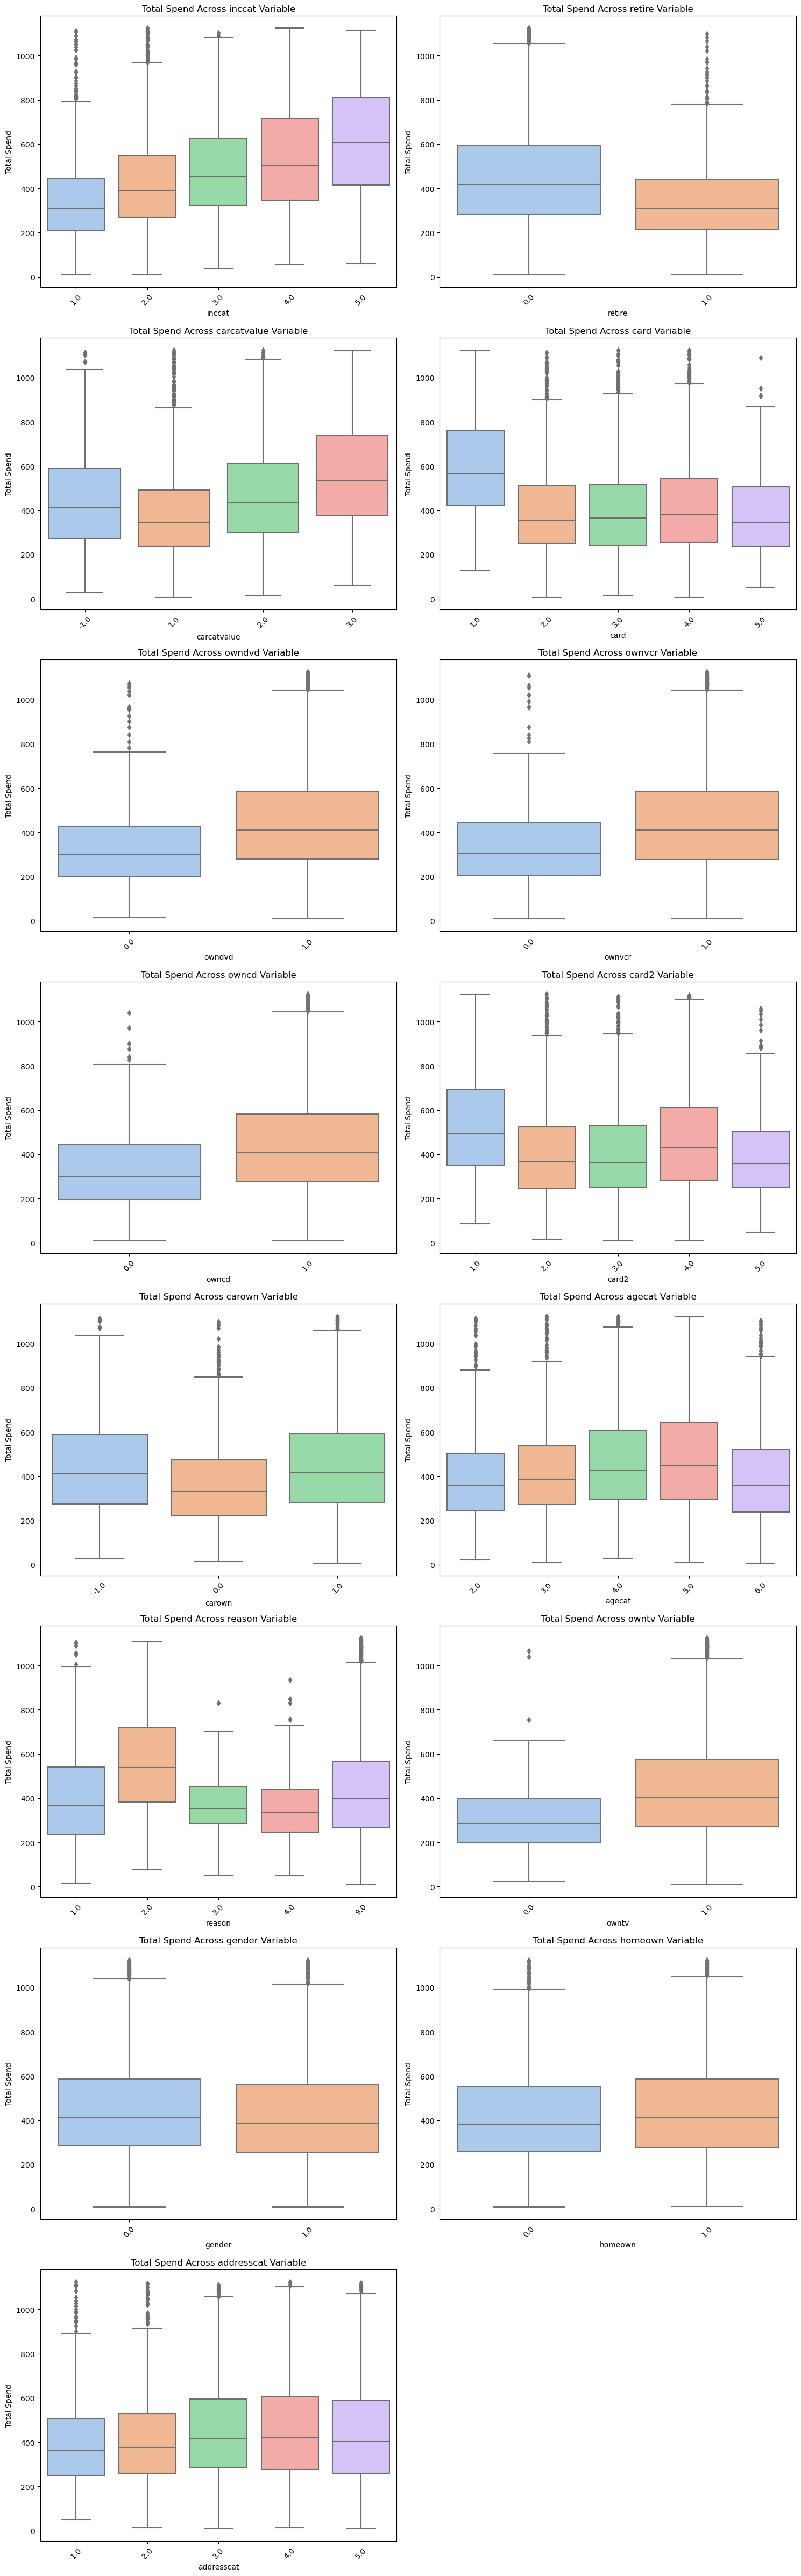

In [40]:
# Set the number of rows and columns for the subplots
num_rows = (len(categorical_columns) - 1) // 2 + 1
num_cols = 2

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
fig.subplots_adjust(hspace=0.6)

# Loop through each categorical column and create the box plot
for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(x=column, y='totalspend', data=df, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Total Spend')
    ax.set_title(f'Total Spend Across {column} Variable')
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplots if the number of columns is not a multiple of 2
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()


In [41]:
# ####################################################

# # Loop through each categorical column and display the summary statistics for 'totalspend'
# for column in categorical_columns:
#     summary_stats = df.groupby(column)['totalspend'].describe()
#     print(f"Summary Statistics for 'totalspend' across '{column}' Variable:")
#     print(summary_stats)
#     print('\n')


| Order | Column        | Insight                                                                                                             | Action                                                                                                               |
|-------|---------------|---------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| 1     | 'income'      | Customers with higher income categories exhibit significantly higher total spending.                              | Implement targeted marketing strategies to attract and retain high-income customers. Offer exclusive perks and promotions to encourage higher spending from this segment.   |
| 2     | 'card'        | Customers who own credit cards tend to have higher spending levels.                                               | Collaborate with credit card companies to offer co-branded credit cards with rewards and benefits tailored to customers' spending preferences.   |
| 3     | 'carown', 'agecat' | Total spend is positively correlated with car ownership and age categories.                                   | Launch marketing campaigns that highlight the company's products or services that align with customers' car ownership and age groups.   |
| 4     | 'owndvd', 'ownvcr' | Customers who own DVD players and VCRs tend to have higher total spending.                                     | Create special packages or discounts on products related to home entertainment to entice customers who own DVD players and VCRs to spend more.   |
| 5     | 'reason'      | Spending behavior is influenced by reasons for purchase, with different reasons leading to varying spending levels. | Conduct customer surveys to understand the primary reasons for purchases and tailor marketing messages to resonate with those specific needs.   |
| 6     | 'owntv'       | Customers who own TVs tend to have higher total spending.                                                         | Leverage the ownership of TVs to promote new product launches and drive impulse purchases through targeted advertisements.   |
| 7     | 'gender'      | Gender plays a role in total spend, with male customers generally spending more than female customers.             | Develop gender-specific marketing campaigns to cater to the preferences and needs of male and female customers effectively.   |
| 8     | 'homeown'     | Homeowners have a slightly higher total spend compared to non-homeowners.                                       | Offer home-related products or services with special discounts or loyalty programs to appeal to homeowners and boost their spending.   |


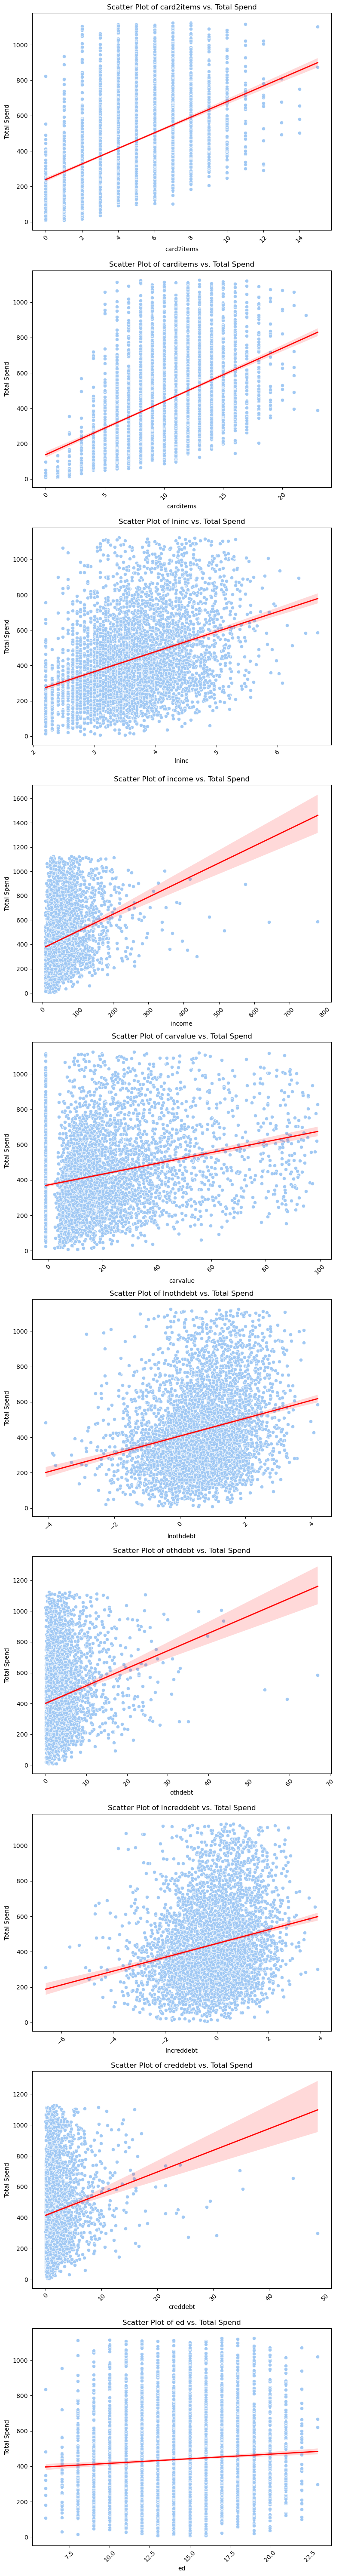

In [42]:

# Set the number of rows and columns for the subplots
num_rows = len(numerical_columns)
num_cols = 1

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6 * num_rows))
fig.subplots_adjust(hspace=0.6)

# Loop through each numerical column and create the scatter plot with best-fit line
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.scatterplot(x=column, y='totalspend', data=df, ax=ax)
    sns.regplot(x=column, y='totalspend', data=df, ax=ax, scatter=False, color='r', line_kws={'linewidth': 2})
    ax.set_xlabel(column)
    ax.set_ylabel('Total Spend')
    ax.set_title(f'Scatter Plot of {column} vs. Total Spend')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [43]:
# ##################################################### 
# import scipy.stats as stats

# # Calculate the correlation between each numerical column and 'totalspend'
# correlation_coeffs, p_values = [], []

# for column in numerical_columns:
#     correlation, p_value = stats.pearsonr(df[column], df['totalspend'])
#     correlation_coeffs.append(correlation)
#     p_values.append(p_value)

# # Create a DataFrame to display the results
# correlation_df = pd.DataFrame({
#     'Numerical Variable': numerical_columns,
#     'Correlation Coefficient': correlation_coeffs,
#     'P-Value': p_values
# })

# # Display the DataFrame
# print("Correlation Analysis with Total Spend:")
# print(correlation_df)


### Insights and Action Plans: Numerical Variables

| Numerical Variable | Insight                                                                                   | Action Plan                                                                             |
|--------------------|-------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| card2items         | Higher card2 items are associated with higher total spending.                            | Enhance rewards for card2 holders with more items to drive increased spending.          |
| carditems          | More card items are associated with higher total spending.                                | Introduce loyalty programs for cardholders with more items to encourage additional spending. |
| lninc              | Higher natural logarithm of income (lninc) is linked to higher total spending.           | Target marketing efforts towards customers with higher lninc, offering premium products. |
| income             | Higher income levels are tied to higher total spending.                                  | Implement targeted marketing to attract and retain high-income customers.                |
| carvalue           | Higher car values are associated with higher total spending.                             | Launch marketing campaigns for products/services appealing to customers with higher car value. |
| lnothdebt          | Higher natural logarithm of other debt (lnothdebt) is linked to higher total spending.   | Offer financial planning to customers with higher lnothdebt to free up funds for spending. |
| othdebt            | Higher other debt levels are linked to higher total spending.                            | Collaborate with financial institutions to offer customized debt consolidation plans for more spending. |
| lncreddebt         | Higher natural logarithm of credit card debt (lncreddebt) is tied to higher total spending. | Offer balance transfer promotions and low-interest credit cards for responsible spending. |
| creddebt           | Higher credit card debt levels are associated with higher total spending.                | Implement financial education programs for better financial well-being.                  |
| ed                 | Higher education levels are linked to higher total spending.                             | Partner with educational institutions for student discounts and targeted marketing.     |


## Multi Variate Graphs

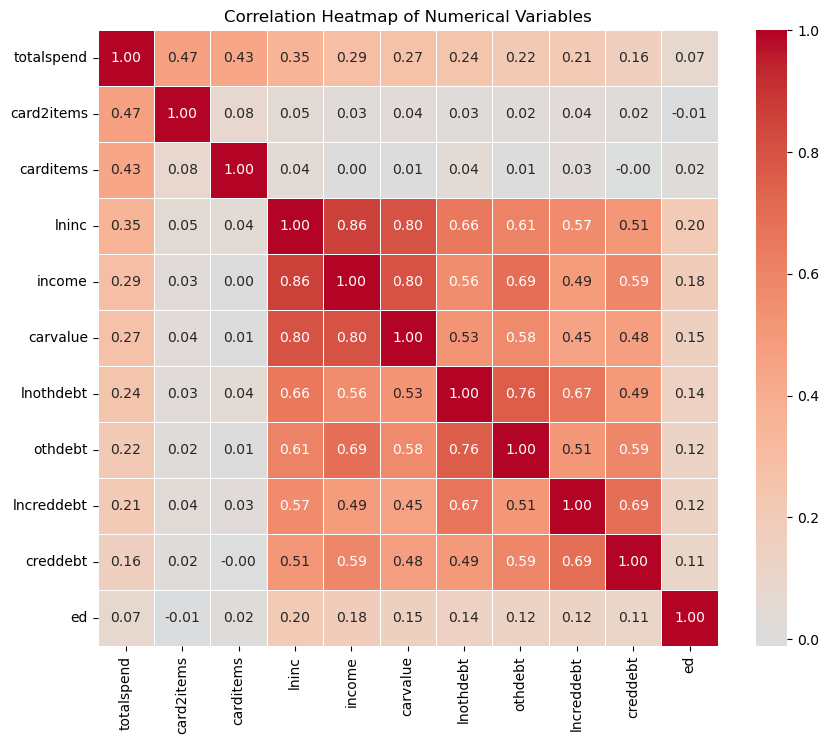

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the categorical columns from the DataFrame
df_numerical = df[['totalspend'] + numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


## Feature Engineering and Feature Selection

#### Featuring Engineering of Numerical Variables. 
lninc (Natural Logarithm of Income): Take the natural logarithm of the "income" column to address non-linearity.

carvalue (Square Root Transformation): Take the square root of the "carvalue" column to stabilize variance.

lnothdebt (Exponential Transformation): Take the exponential of the "lnothdebt" column to improve interpretability.

lncreddebt (Exponential Transformation): Take the exponential of the "lncreddebt" column for better linearity.

creddebt (Square Root Transformation): Take the square root of the "creddebt" column to improve linearity.

ed (Log Transformation): Take the logarithm of the "ed" column to address non-linearity.

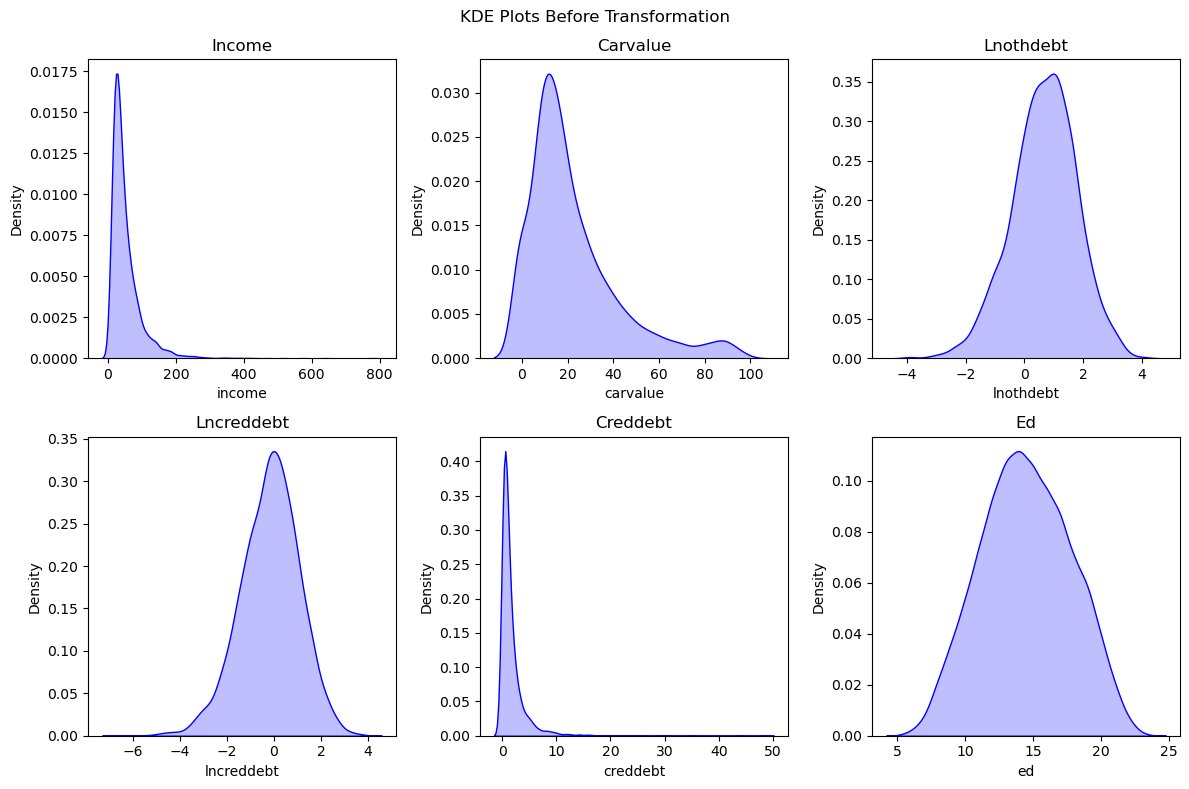

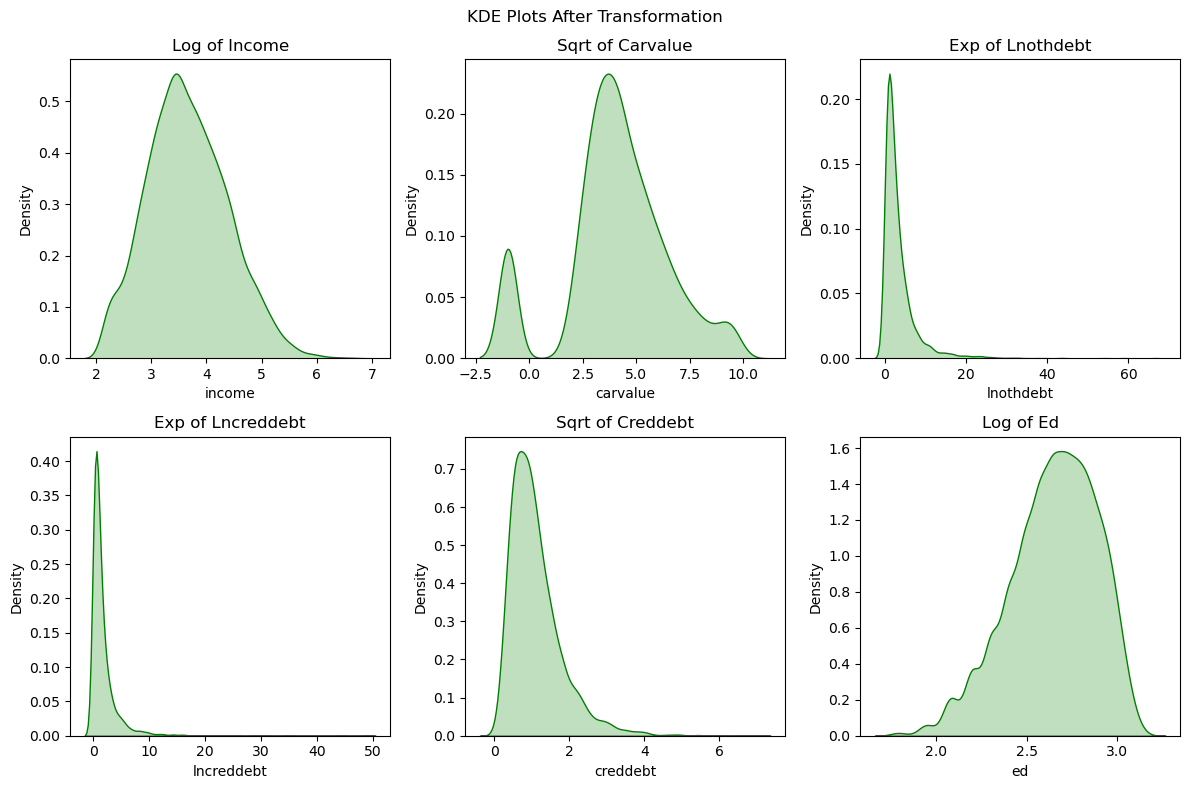

In [45]:
# Columns for transformation
columns_to_transform = ['income', 'carvalue', 'lnothdebt', 'lncreddebt', 'creddebt', 'ed']

# Plot KDE plots of the columns before transformation
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('KDE Plots Before Transformation', fontsize=12)

for i, column in enumerate(columns_to_transform):
    row = i // 3
    col = i % 3
    sns.kdeplot(df[column], ax=axes[row, col], fill=True, color='blue')
    axes[row, col].set_title(column.capitalize())

plt.tight_layout()
plt.show()

# Apply the transformations in a loop
transformations = ['np.log', 'np.sqrt', 'np.exp', 'np.exp', 'np.sqrt', 'np.log']

for i, column in enumerate(columns_to_transform):
    if transformations[i] == 'np.sqrt':
        df[column] = df[column].apply(lambda x: np.sqrt(x) if x >= 0 else x)  # Handling negative values for square root transformation
    else:
        df[column] = eval(f"{transformations[i]}(df['{column}'])")

# Plot KDE plots of the columns after transformation
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('KDE Plots After Transformation', fontsize=12)

for i, column in enumerate(columns_to_transform):
    row = i // 3
    col = i % 3
    sns.kdeplot(df[column], ax=axes[row, col], fill=True, color='green')
    axes[row, col].set_title(f"{transformations[i].replace('np.', '').capitalize()} of {column.capitalize()}")

plt.tight_layout()
plt.show()


In [46]:
df.isna().sum().sum()

0

### Outlier treatment

In [47]:
# Outlier treatment for 'income' column
Q1_income = df['income'].quantile(0.25)
Q3_income = df['income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
df['income'] = df['income'].clip(lower_bound_income, upper_bound_income)

# Outlier treatment for 'carvalue' column
Q1_carvalue = df['carvalue'].quantile(0.25)
Q3_carvalue = df['carvalue'].quantile(0.75)
IQR_carvalue = Q3_carvalue - Q1_carvalue
lower_bound_carvalue = Q1_carvalue - 1.5 * IQR_carvalue
upper_bound_carvalue = Q3_carvalue + 1.5 * IQR_carvalue
df['carvalue'] = df['carvalue'].clip(lower_bound_carvalue, upper_bound_carvalue)


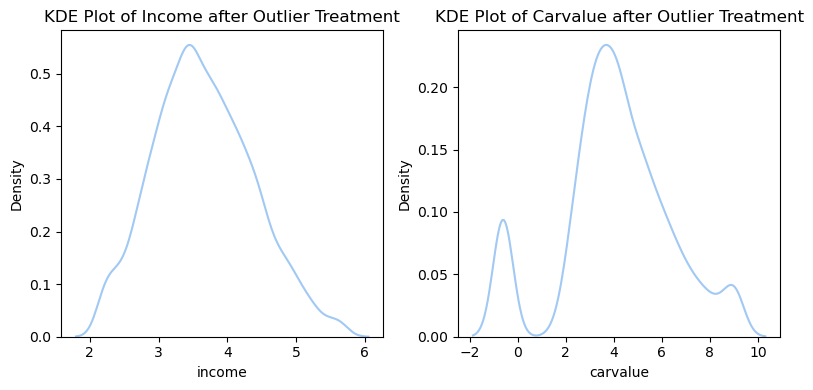

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for KDE plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot KDE for 'income' column
sns.kdeplot(data=df, x='income', ax=axes[0])
axes[0].set_title('KDE Plot of Income after Outlier Treatment')

# Plot KDE for 'carvalue' column
sns.kdeplot(data=df, x='carvalue', ax=axes[1])
axes[1].set_title('KDE Plot of Carvalue after Outlier Treatment')

plt.tight_layout()
plt.show()


### Feature Selection

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_columns = ['card2items', 'carditems', 'lninc', 'income', 'carvalue', 'lnothdebt', 'othdebt', 'lncreddebt', 'creddebt', 'ed']

# Add a constant column to the data for the intercept in the regression model
X = add_constant(df[numerical_columns])

# Calculate VIF for each column
vif_values = pd.DataFrame()
vif_values['Numerical Variable'] = X.columns
vif_values['VIF Value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the constant column from the result
vif_values = vif_values[vif_values['Numerical Variable'] != 'const']

# Display the VIF values
print(vif_values)


   Numerical Variable     VIF Value
1          card2items      1.011096
2           carditems      1.011458
3               lninc    768.802657
4              income    761.061938
5            carvalue      1.806195
6           lnothdebt  18459.017816
7             othdebt  18457.163159
8          lncreddebt      6.861350
9            creddebt      7.674167
10                 ed      1.038994


In [50]:
# Drop the columns with high VIF values
columns_to_drop = ['income', 'othdebt']
df = df.drop(columns=columns_to_drop)


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_columns = ['card2items', 'carditems', 'lninc', 'carvalue', 'lnothdebt', 'lncreddebt', 'creddebt', 'ed']

# Add a constant column to the data for the intercept in the regression model
X = add_constant(df[numerical_columns])

# Calculate VIF for each column
vif_values = pd.DataFrame()
vif_values['Numerical Variable'] = X.columns
vif_values['VIF Value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the constant column from the result
vif_values = vif_values[vif_values['Numerical Variable'] != 'const']

# Display the VIF values
print(vif_values)


  Numerical Variable  VIF Value
1         card2items   1.010705
2          carditems   1.011042
3              lninc   2.654127
4           carvalue   1.801320
5          lnothdebt   1.912279
6         lncreddebt   6.528198
7           creddebt   7.323213
8                 ed   1.038294


# Model Building

In [52]:
#Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Import the Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

#import the metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



## Train test Split

In [53]:
df.columns

Index(['custid', 'inccat', 'retire', 'carcatvalue', 'card', 'owndvd', 'ownvcr',
       'owncd', 'card2', 'carown', 'agecat', 'reason', 'owntv', 'gender',
       'homeown', 'addresscat', 'card2items', 'carditems', 'lninc', 'carvalue',
       'lnothdebt', 'lncreddebt', 'creddebt', 'ed', 'totalspend'],
      dtype='object')

In [54]:
independent_features = ['inccat', 'retire', 'carcatvalue', 'card', 'owndvd', 'ownvcr', 'owncd', 
                        'card2', 'carown', 'agecat', 'reason', 'owntv', 'gender', 'homeown', 'addresscat', 
                        'card2items', 'carditems', 'lninc', 'carvalue', 'lnothdebt', 'lncreddebt', 'creddebt', 'ed']
dependent_features = ['totalspend']

In [55]:
print(independent_features)

['inccat', 'retire', 'carcatvalue', 'card', 'owndvd', 'ownvcr', 'owncd', 'card2', 'carown', 'agecat', 'reason', 'owntv', 'gender', 'homeown', 'addresscat', 'card2items', 'carditems', 'lninc', 'carvalue', 'lnothdebt', 'lncreddebt', 'creddebt', 'ed']


In [56]:
X = df[independent_features]
y = df[dependent_features]

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)          # or: fit_transform(X_train)
X_test= scaler.transform(X_test)

In [59]:
# Data frame of Evaluation metrics of all the models
metrics = pd.DataFrame(columns=['Model','MSE','MAE','RMSE','R2','Adjusted R2'])
metrics

,Model,MSE,MAE,RMSE,R2,Adjusted R2


In [60]:
## Linear Regression

In [61]:
Linear_reg = LinearRegression()
Linear_reg.fit(X_train,y_train)

LinearRegression()

In [62]:
Linear_reg.coef_


array([[ 7.81404480e+01,  9.37213930e+00,  6.33079125e+01,
        -1.87573418e+02, -3.55201083e-01, -7.83345328e+00,
         1.23280735e+00, -1.07006164e+02,  2.26391055e+01,
        -9.51749087e+00, -5.26607905e+00,  1.06085870e+00,
        -1.65973067e+01, -1.14671370e+00, -1.59564877e+01,
         5.56769647e+02,  6.07665937e+02,  3.62512920e+02,
        -1.09051500e+02,  6.42304114e+01, -1.51402705e+02,
         5.73975390e+01, -2.62796590e+01]])

In [63]:
Linear_reg.score(X_train,y_train)


0.5249813898405677

In [64]:
y_pred = Linear_reg.predict(X_test)


In [65]:
# Evalute Linear Regression model

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 22919.096916880208
MAE : 117.92455907617733
RMSE : 151.3905443443553
R2 : 0.5390952402337712
Adjusted R2 :  0.5276225027071226


In [66]:
LR = {'Model':'Linear Regression', 'MSE': MSE, 'MAE':MAE, 'RMSE':RMSE, 'R2': r2,'Adjusted R2': Adjusted_R2 }
metrics = pd.concat([metrics, pd.DataFrame([LR])], ignore_index=True)
metrics

,Model,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear Regression,22919.096917,117.924559,151.390544,0.539095,0.527623


## Lasso Regression


In [67]:
lasso = Lasso(alpha=0.005,max_iter=3000)

In [68]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [69]:
lasso.score(X_train,y_train)

0.5249782586683822

In [70]:
y_pred_lasso = lasso.predict(X_test)

In [71]:
# Evalute the model

MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred_lasso)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 22915.047416925416
MAE : 117.91666388222578
RMSE : 151.37716940452222
R2 : 0.539176675981899
Adjusted R2 :  0.5277059655355609


In [72]:
LaR = {'Model':'Lasso Regression', 'MSE': MSE, 'MAE':MAE, 'RMSE':RMSE, 'R2': r2,'Adjusted R2': Adjusted_R2 }
metrics = pd.concat([metrics, pd.DataFrame([LaR])], ignore_index=True)

metrics

,Model,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear Regression,22919.096917,117.924559,151.390544,0.539095,0.527623
1,Lasso Regression,22915.047417,117.916664,151.377169,0.539177,0.527706


## Ridge Regression

In [73]:
ridge = Ridge(alpha=0.1)


In [74]:
ridge.fit(X_train,y_train)

ridge.score(X_train, y_train)

0.5249794867228297

In [75]:
y_pred_ridge = ridge.predict(X_test)


In [76]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred_ridge)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 22916.046275817174
MAE : 117.91444119053324
RMSE : 151.38046860746988
R2 : 0.5391565888545912
Adjusted R2 :  0.5276853784040019


In [77]:
RR = {'Model':'Ridge Regression', 'MSE': MSE, 'MAE':MAE, 'RMSE':RMSE, 'R2': r2,'Adjusted R2': Adjusted_R2 }
metrics = pd.concat([metrics, pd.DataFrame([RR])], ignore_index=True)

metrics

,Model,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear Regression,22919.096917,117.924559,151.390544,0.539095,0.527623
1,Lasso Regression,22915.047417,117.916664,151.377169,0.539177,0.527706
2,Ridge Regression,22916.046276,117.914441,151.380469,0.539157,0.527685


Text(0, 0.5, 'Predicted Sales')

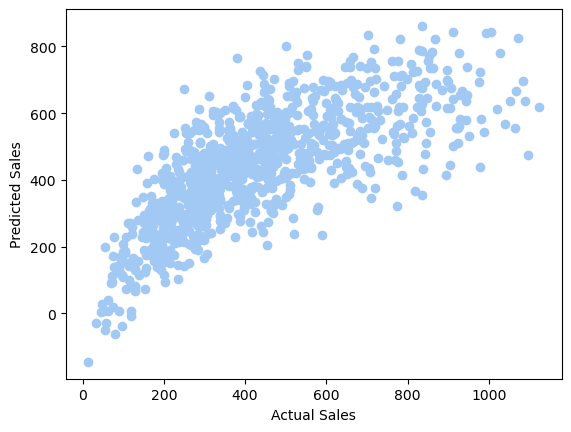

In [78]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

## Stochastic Gradient Descent Regressor

In [79]:
SGD = SGDRegressor()

In [80]:
SGD.fit(X_train,y_train)

SGDRegressor()

In [81]:
SGD.score(X_train,y_train)

0.5213863923937556

In [82]:
y_pred_SGD = SGD.predict(X_test)

In [83]:
#Evalute the model 
MSE  = mean_squared_error(y_test, y_pred_SGD)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred_SGD)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_SGD)
print("R2 :" ,r2)
Adjusted_R2 =1-(1-r2_score(y_test, y_pred_SGD))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 22837.9867809217
MAE : 116.53405664798261
RMSE : 151.12242315725916
R2 : 0.5407263711576528
Adjusted R2 :  0.5292942353747805


In [84]:
GD = {'Model':'SGD Regression', 'MSE': MSE, 'MAE':MAE, 'RMSE':RMSE, 'R2': r2,'Adjusted R2': Adjusted_R2 }
metrics = pd.concat([metrics, pd.DataFrame([GD])], ignore_index=True)
metrics


,Model,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear Regression,22919.096917,117.924559,151.390544,0.539095,0.527623
1,Lasso Regression,22915.047417,117.916664,151.377169,0.539177,0.527706
2,Ridge Regression,22916.046276,117.914441,151.380469,0.539157,0.527685
3,SGD Regression,22837.986781,116.534057,151.122423,0.540726,0.529294


## Random Forest Regressor

In [85]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [86]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [87]:
rf_regressor.score(X_train,y_train)

0.9039293898603814

In [88]:
y_pred_rf = rf_regressor.predict(X_test)

In [89]:
#Evalute the model 
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

MAE=mean_absolute_error(y_test, y_pred_rf)
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)
Adjusted_R2 = 1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 25752.49439607806
MAE : 119.86365189873418
RMSE : 160.47583742133287
R2 : 0.482115404195376
Adjusted R2 :  0.46922433741668945


In [90]:
RF = {'Model':'Random Forest Regression ', 'MSE': MSE, 'MAE':MAE, 'RMSE':RMSE, 'R2': r2,'Adjusted R2': Adjusted_R2 }
metrics = pd.concat([metrics, pd.DataFrame([RF])], ignore_index=True)


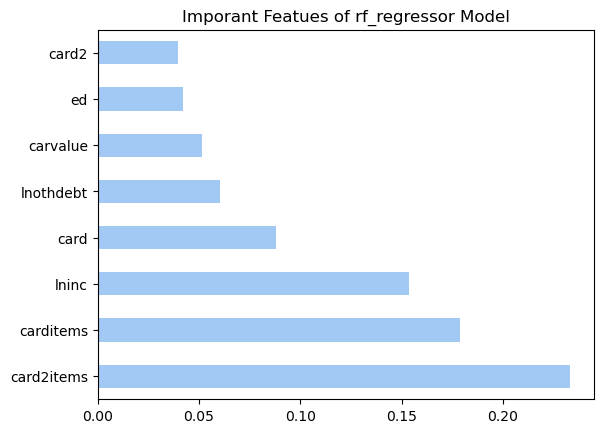

In [91]:

important_features = pd.Series(rf_regressor.feature_importances_, index=X.columns)
important_features.nlargest(8).plot(kind='barh')
plt.title('Imporant Featues of rf_regressor Model')
plt.show()

# Final Results


In [92]:
print('Base Model')
print('The mean sales value is ',round(df.totalspend.mean(),2))
print('The standard deviation sales value is', round(df.totalspend.std(),2))

pd.set_option('display.float_format', lambda x: '%0.3f' % x)
metrics

Base Model
The mean sales value is  439.89
The standard deviation sales value is 231.47


,Model,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear Regression,22919.097,117.925,151.391,0.539,0.528
1,Lasso Regression,22915.047,117.917,151.377,0.539,0.528
2,Ridge Regression,22916.046,117.914,151.380,0.539,0.528
3,SGD Regression,22837.987,116.534,151.122,0.541,0.529
4,Random Forest Regression,25752.494,119.864,160.476,0.482,0.469



#### Linear Regression, Lasso Regression, Ridge Regression, and SGD Regression show similar performance with low MSE and moderate R2, making them viable choices for prediction tasks.

#### Random Forest Regression performs slightly worse than the linear-based models, with higher MSE and lower R2, suggesting limited suitability for this dataset.